### 농구선수의 게임 데이터를 활용한 포지션 예측
##### 문제정의
- NBA 농구 선수들의 게임 기록을 데이터로 사용해서 특정 농구 선수의 포지션을 예측해보자

In [34]:
import pandas as pd

In [35]:
df = pd.read_csv('data/basketball.csv')
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


- Player: 선수 이름
- Pos: 포지션(예측대상) - SG/C
= 3P: 경기당 평균 3점슛
- 2P: 경기당 평균 2점슛
- TRB: 경기당 평균 리바운드 횟수
- AST: 경기당 평균 어시스트 횟수
- STL: 경기당 평균 스틸 횟수
- BLK: 경기당 평균 블로킹 횟수

In [36]:
# 포지션 종류 파악
print(df['Pos'].unique())

# 포지션 별 갯수 파악
print(df['Pos'].value_counts())

['SG' 'C']
SG    50
C     50
Name: Pos, dtype: int64


In [37]:
# make pos as categorical
df['Pos'] = df['Pos'].astype('category')

### 데이터 시각화
- 데이터를 특징을 바탕으로 한 공간에서 시각화함으로써 머신러닝 학습에 필요한 특징과 불필요한 특징을 쉽게 구분

In [38]:
# import plt
import matplotlib.pyplot as plt
import seaborn as sns
# AppleGothic
plt.rcParams['font.family'] = 'AppleGothic'

##### 스틸, 2점슛 데이터 시각화

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


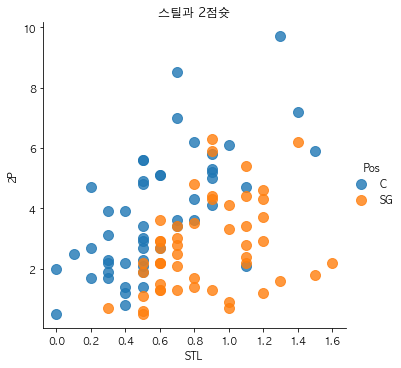

In [39]:
sns.lmplot(
  'STL',
  '2P',
  data=df,
  scatter_kws={'s': 100}, # 점 크기
  fit_reg=False,
  hue='Pos',
)
plt.title('스틸과 2점슛')
plt.show()

##### 어시스트와 2점슛

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


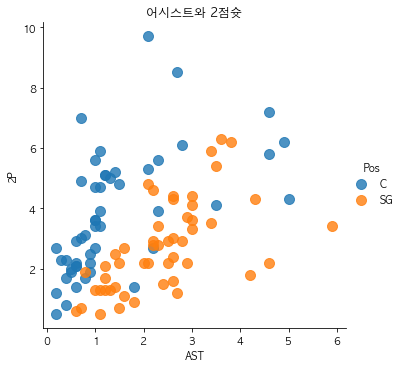

In [40]:
sns.lmplot(
  'AST',
  '2P',
  data=df,
  scatter_kws={'s': 100}, # 점 크기
  fit_reg=False,
  hue='Pos',
)
plt.title('어시스트와 2점슛')
plt.show()

> 2점슛, 어시스트, 스틸의 속성으로 데이터를 분포시킬 경우   
> 슈팅가드와 센터의 경계가 너무 근접해서 분류하기에 모호하다

##### 3점슛, 블로킹 보기

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


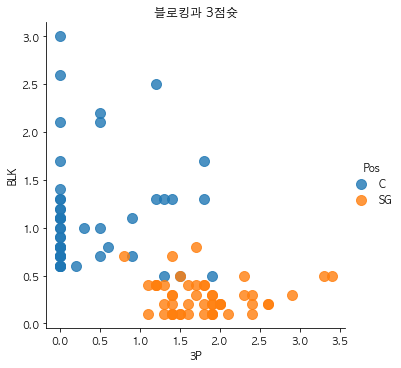

In [41]:
sns.lmplot(
  '3P',
  'BLK',
  data=df,
  scatter_kws={'s': 100},
  fit_reg=False,
  hue='Pos',
)
plt.title('블로킹과 3점슛')
plt.show()

##### 리바운드와 3점슛

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


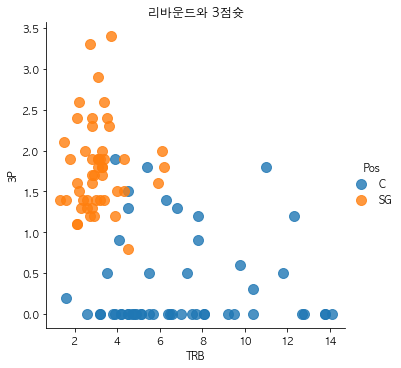

In [42]:
sns.lmplot(
  'TRB',
  '3P',
  data=df,
  scatter_kws={'s': 100},
  fit_reg=False,
  hue='Pos',
)
plt.title('리바운드와 3점슛')
plt.show()

##### 어시스트와 리바운드

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


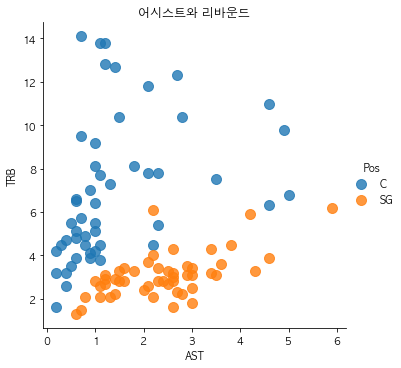

In [43]:
sns.lmplot(
  'AST',
  'TRB',
  data=df,
  scatter_kws={'s': 100},
  fit_reg=False,
  hue='Pos',
)
plt.title('어시스트와 리바운드')
plt.show()

##### 분별력이 없는 특징 제거

In [44]:
# remove 2P, AST, STL
df = df.drop(['2P', 'AST', 'STL'], axis=1)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


In [46]:
# 학습데이터와 테스트 데이터 분리
from sklearn.model_selection import train_test_split
# 학습데이터와 테스트 데이터 분리
train, test = train_test_split(df, test_size=0.2)

# 데이터 저장하기
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)